In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
data=pd.read_excel(r'C:\Users\Josewin\Train_dataset.xlsx')

In [4]:
n=data.shape[0]
p=data.shape[1]

In [5]:
data.drop("Index",axis=1,inplace=True)
data.drop("Industry",axis=1,inplace=True)
data.drop("Stock Index",axis=1,inplace=True)

In [6]:
data.dropna(inplace=True)

In [7]:
n=data.shape[0]
p=data.shape[1]
n,p

(6592, 12)

In [8]:
data=data.values

In [9]:
train_start=0
train_end=int(np.floor(0.8*n))
test_start=train_end
test_end=n
data_train=data[np.arange(train_start,train_end),:]
data_test=data[np.arange(test_start,test_end),:]

In [10]:
scaler=MinMaxScaler()
data_train=scaler.fit_transform(data_train)
data_test=scaler.transform(data_test)

In [11]:
X_train=data_train[:, 1:]
Y_train=data_train[:, 0]
X_test=data_test[:, 1:]
Y_test=data_test[:, 0]

In [12]:
n_stocks=X_train.shape[1]
n_stocks

11

In [13]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
X=tf.placeholder(dtype=tf.float32,shape=[None,n_stocks])
Y=tf.placeholder(dtype=tf.float32,shape=[None])

In [14]:
sigma=1
weight_initializer=tf.variance_scaling_initializer(mode="fan_avg",distribution="uniform")
bias_initializer=tf.zeros_initializer()

In [15]:
n_neurons_1=11
n_neurons_2=11
n_neurons_3=11
n_neurons_4=11
n_target=1

In [16]:
W_hidden_1=tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1=tf.Variable(bias_initializer([n_neurons_1]))
W_hidden_2=tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2=tf.Variable(bias_initializer([n_neurons_2]))
W_hidden_3=tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3=tf.Variable(bias_initializer([n_neurons_3]))
W_hidden_4=tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4=tf.Variable(bias_initializer([n_neurons_4]))
W_out=tf.Variable(weight_initializer([n_neurons_4, n_target]))
bias_out=tf.Variable(bias_initializer([n_target]))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [17]:
hidden_1=tf.nn.relu(tf.add(tf.matmul(X,W_hidden_1), bias_hidden_1))
hidden_2=tf.nn.relu(tf.add(tf.matmul(hidden_1,W_hidden_2), bias_hidden_2))
hidden_3=tf.nn.relu(tf.add(tf.matmul(hidden_2,W_hidden_3), bias_hidden_3))
hidden_4=tf.nn.relu(tf.add(tf.matmul(hidden_3,W_hidden_4), bias_hidden_4))
out=tf.transpose(tf.add(tf.matmul(hidden_4,W_out), bias_out))

In [18]:
mse=tf.reduce_mean(tf.squared_difference(out,Y))
opt=tf.train.AdamOptimizer().minimize(mse)

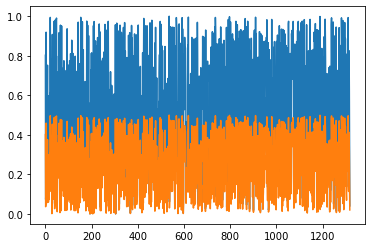

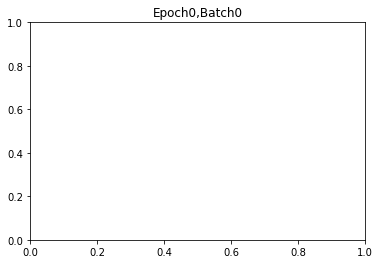

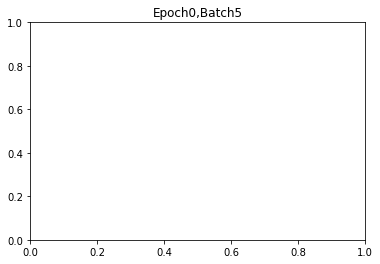

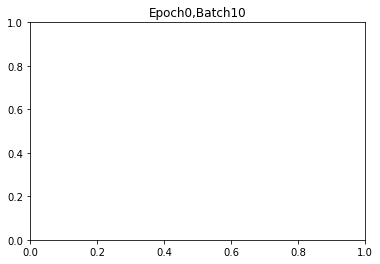

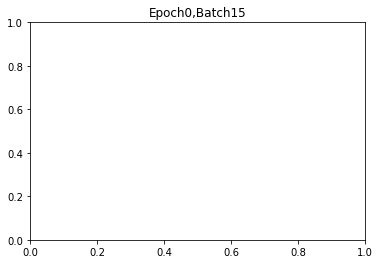

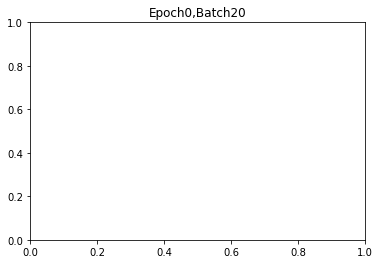

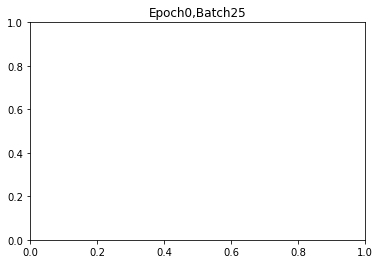

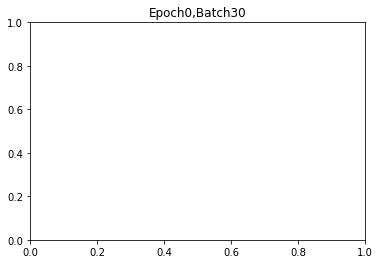

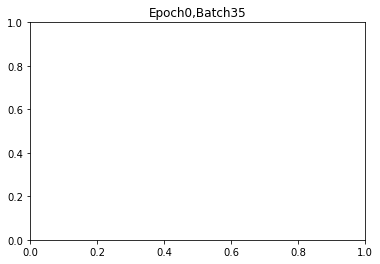

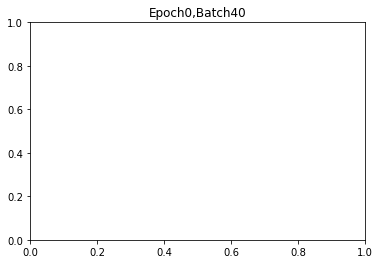

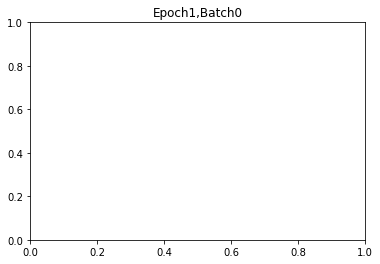

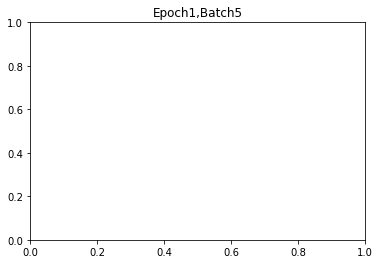

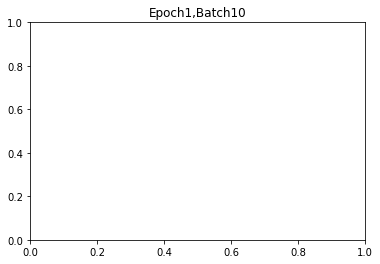

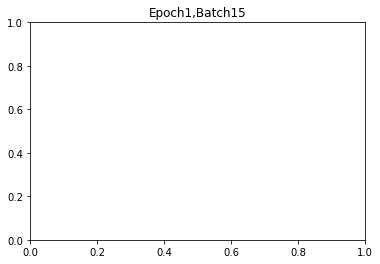

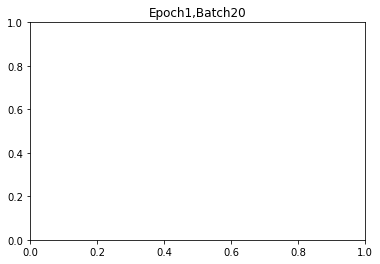

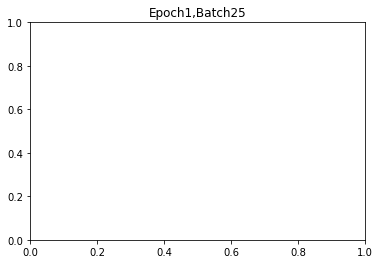

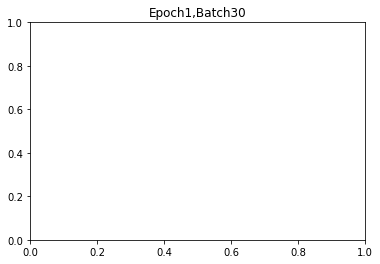

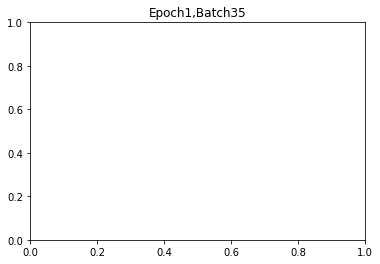

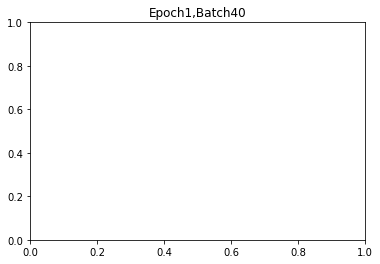

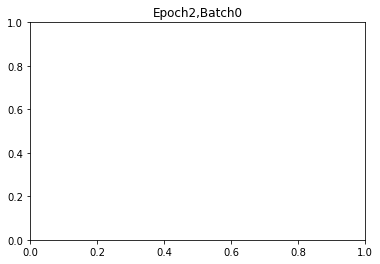

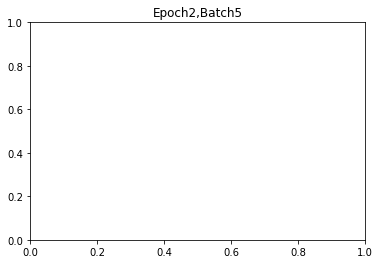

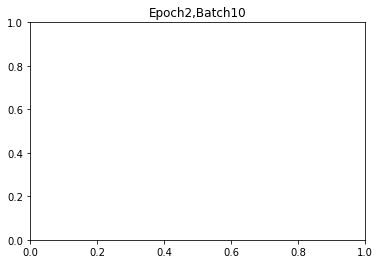

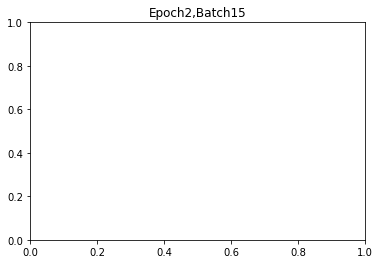

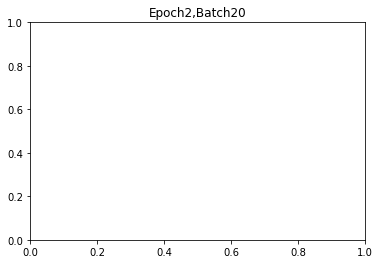

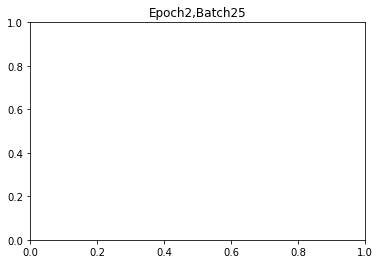

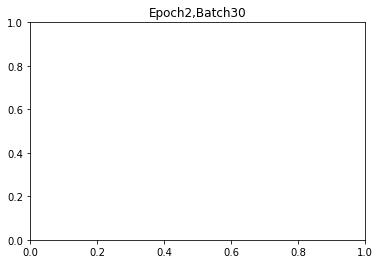

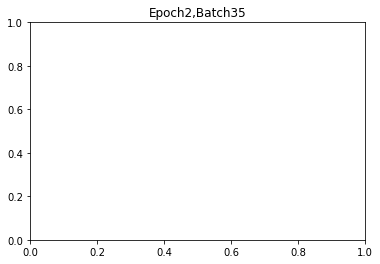

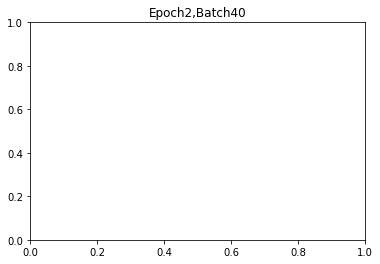

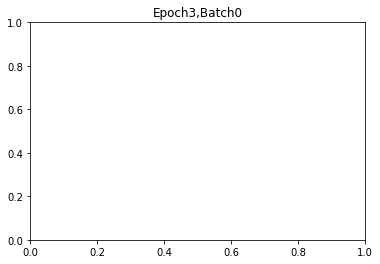

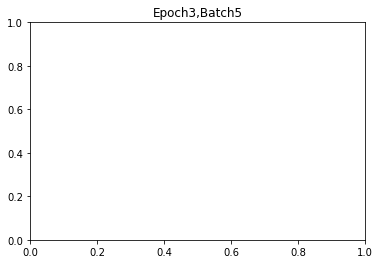

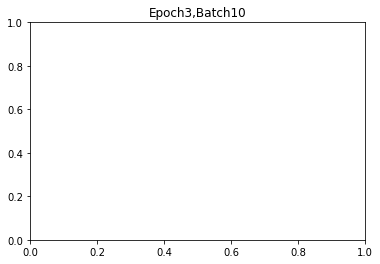

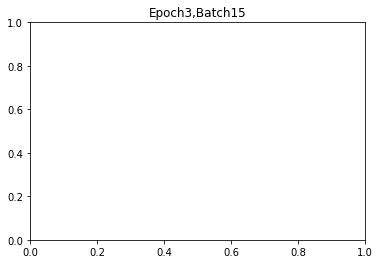

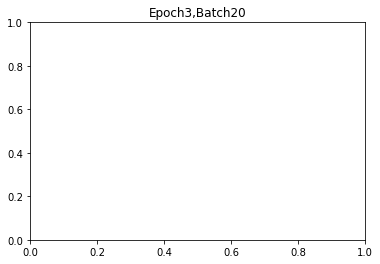

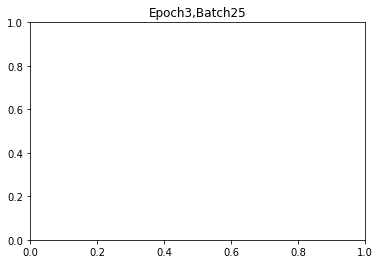

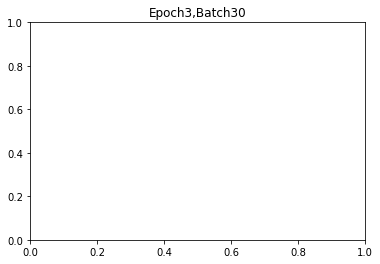

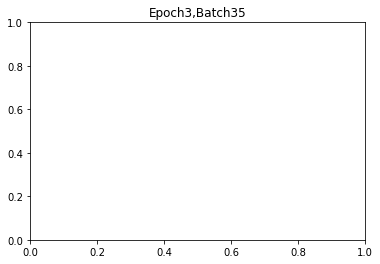

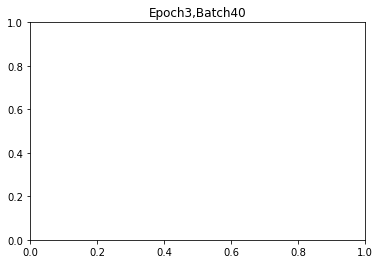

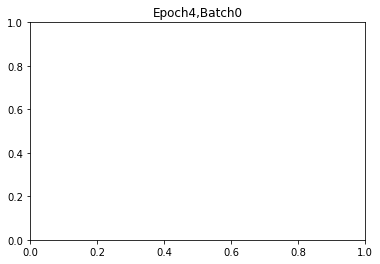

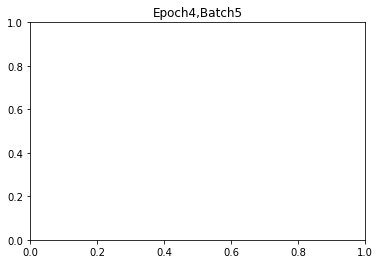

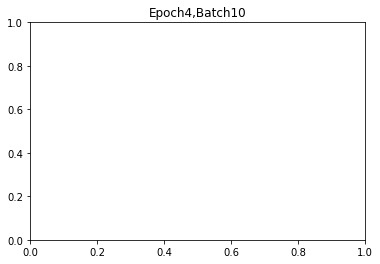

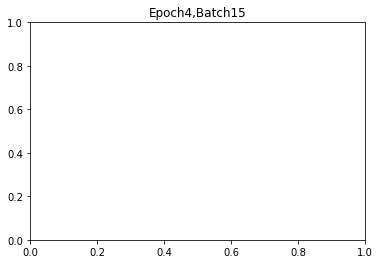

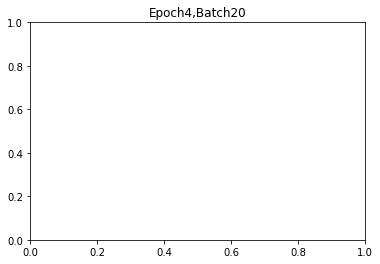

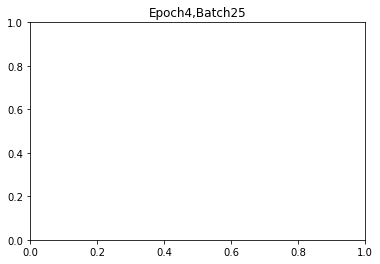

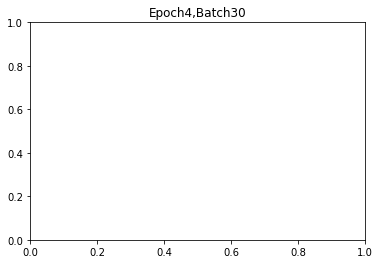

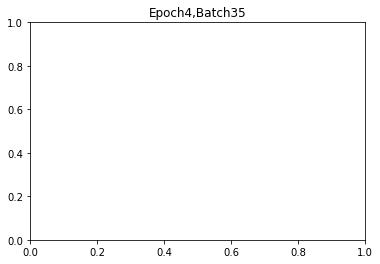

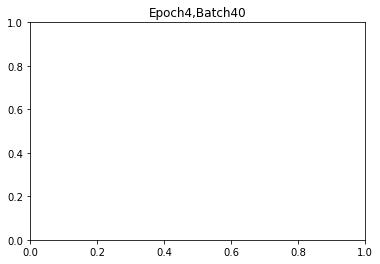

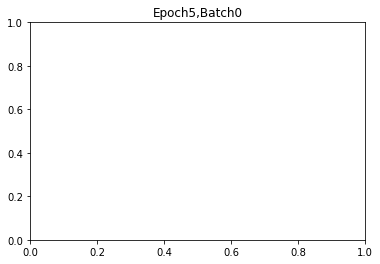

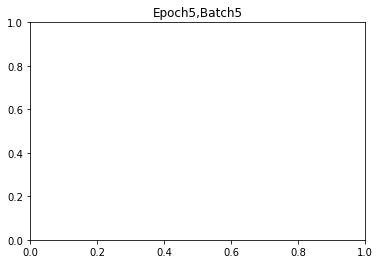

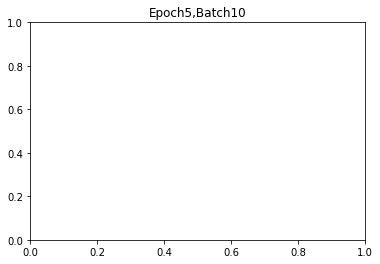

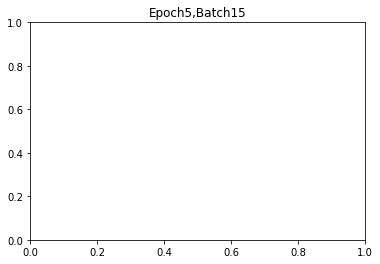

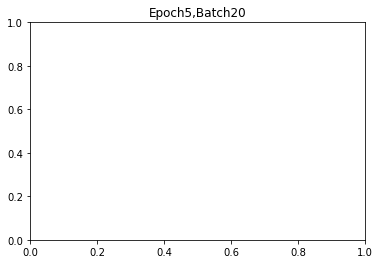

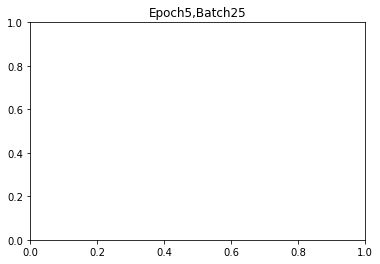

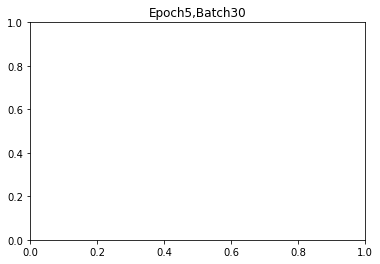

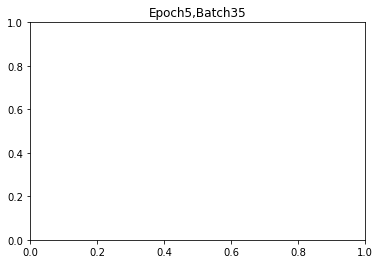

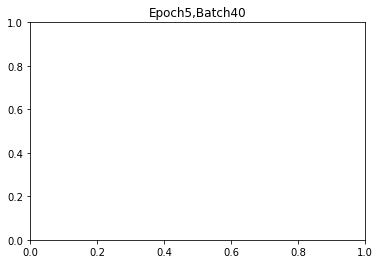

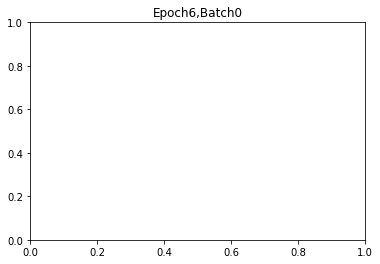

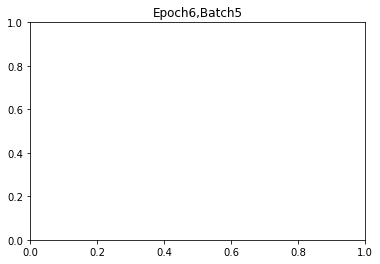

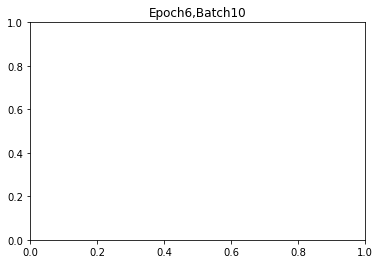

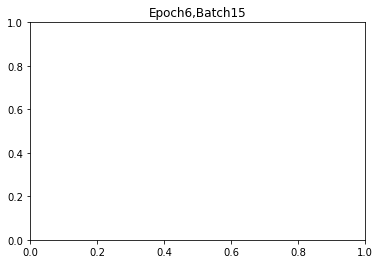

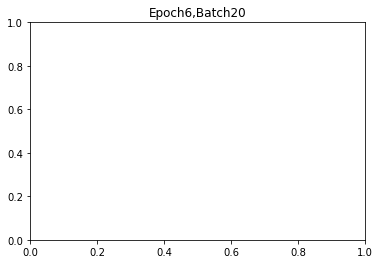

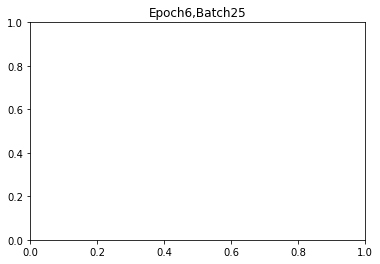

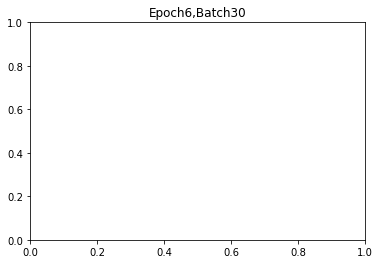

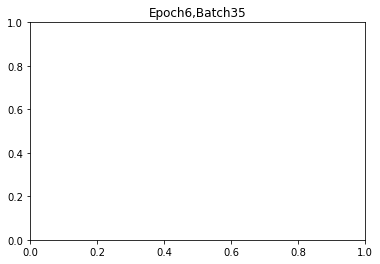

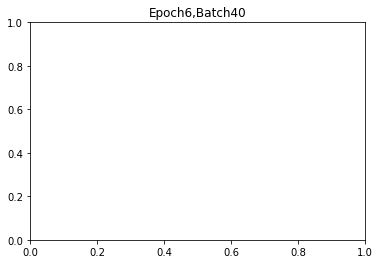

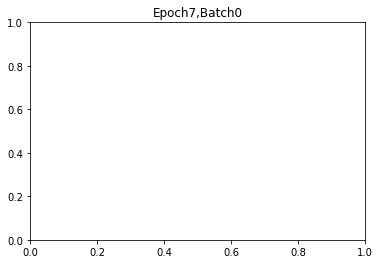

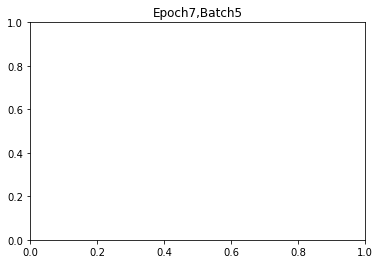

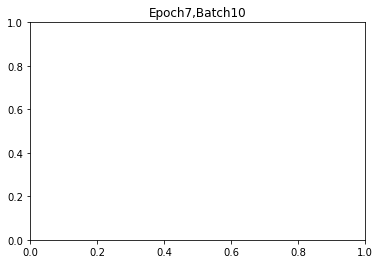

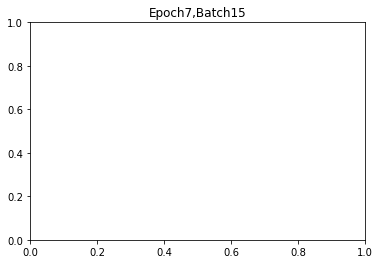

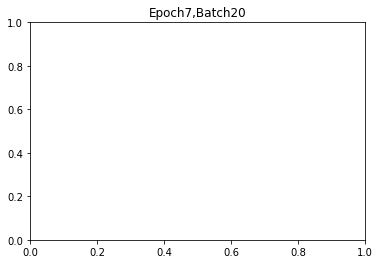

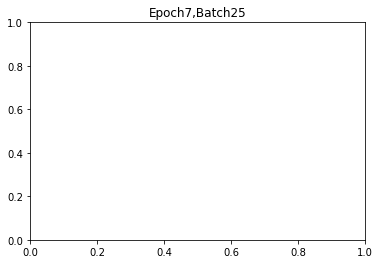

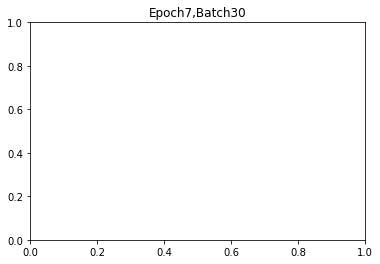

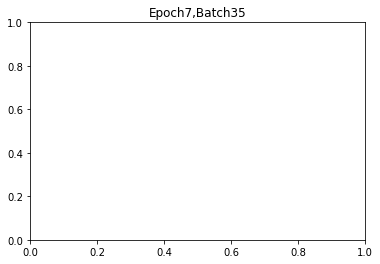

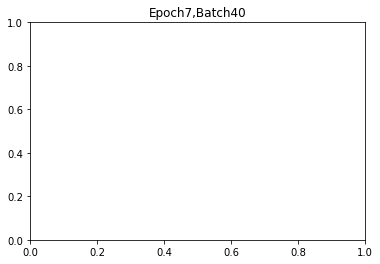

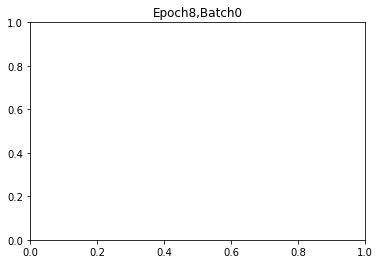

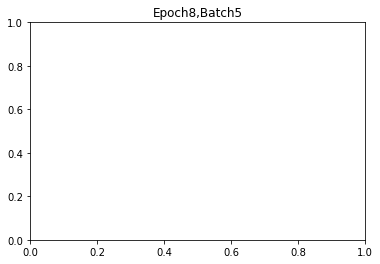

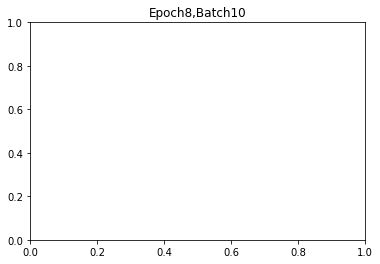

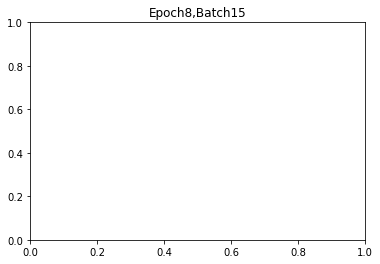

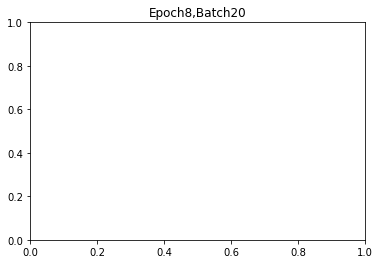

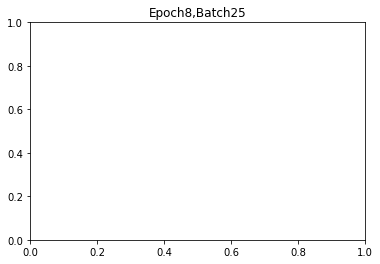

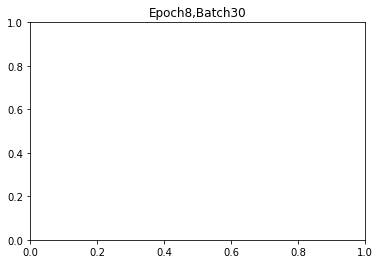

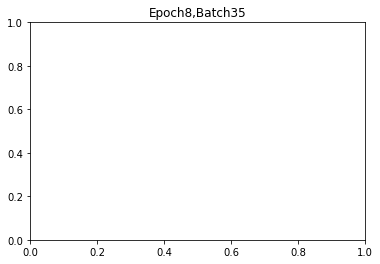

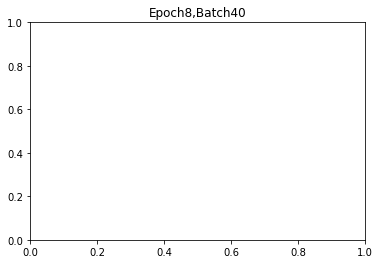

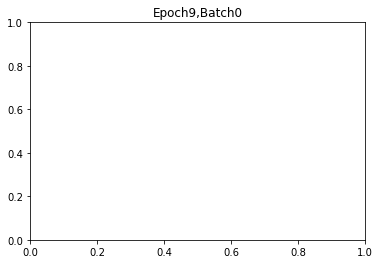

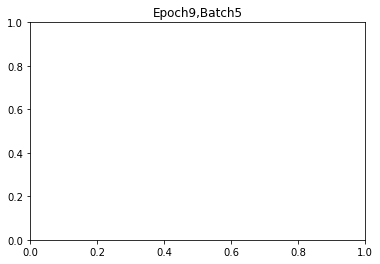

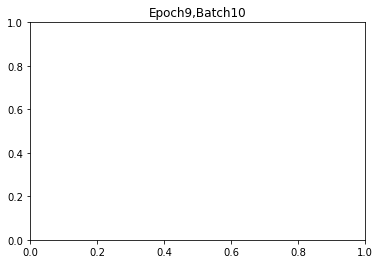

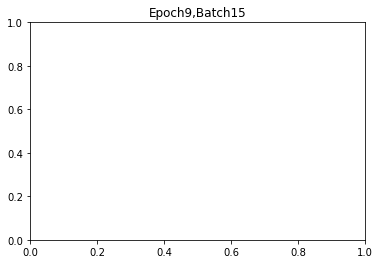

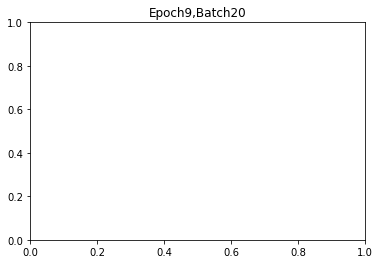

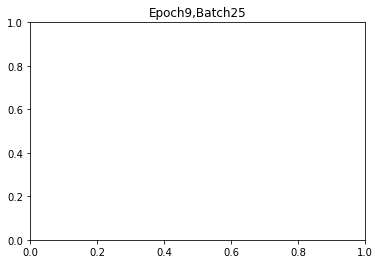

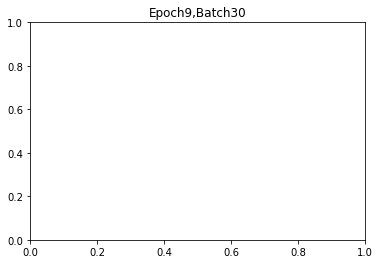

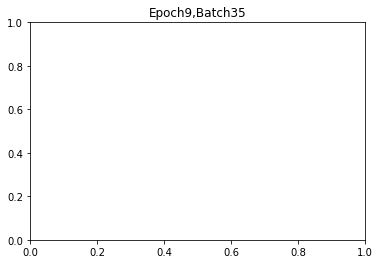

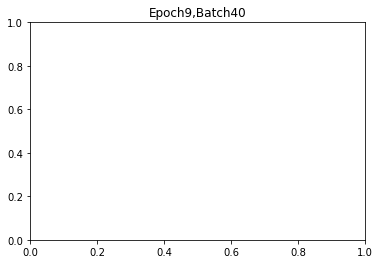

0.0854422


In [19]:
net=tf.Session()
net.run(tf.global_variables_initializer())

plt.ion()
fig=plt.figure()
ax1=fig.add_subplot(111)
line1,=ax1.plot(Y_test)
line2,=ax1.plot(Y_test*0.5)
plt.show()

epochs=10
batch_size=125
for e in range(epochs):
    shuffle_indices=np.random.permutation(np.arange(len(Y_train)))
    X_train=X_train[shuffle_indices]
    Y_train=Y_train[shuffle_indices]
    for i in range(0,len(Y_train)//batch_size):
        start=i*batch_size
        batch_X=X_train[start:start+batch_size]
        batch_Y=Y_train[start:start+batch_size]
        net.run(opt,feed_dict={X:batch_X, Y:batch_Y})
        if np.mod(i,5)==0:
            pred=net.run(out,feed_dict={X:X_test})
            line2.set_ydata(pred)
            plt.title('Epoch'+str(e)+',Batch'+str(i))
            file_name='epoch_'+str(e)+'_batch_'+str(i)+'.png'
            plt.savefig(file_name)
            plt.pause(0.01)
            
mse_final=net.run(mse,feed_dict={X:X_test,Y:Y_test})
print(mse_final)

In [20]:
accuracy=(1-mse_final)*100
accuracy

91.45577996969223

In [63]:
test=pd.read_excel(r'C:\Users\Josewin\Test_dataset.xlsx')

In [64]:
test.head(5)

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
4,AC3239,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,NaN,6.18


In [65]:
test.drop("Index",axis=1,inplace=True)
test.drop("Industry",axis=1,inplace=True)
test.dropna(inplace=True)

In [66]:
n_test=data.shape[0]
p_test=data.shape[1]
n_test,p_test

(6592, 12)

In [67]:
test.head(5)

,Stock Index,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,AC3235,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,AC3236,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,AC3237,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,AC3238,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
6,AC3241,227.28,38182.08,38.50,193.01,4934899.0,4.91,0.03,0.0265,74.9,1.23,4.60


In [68]:
S=test.iloc[:,0:1].values

In [69]:
test=test.values

In [70]:
test_input=test[np.arange(0,2415),:]

In [71]:
Z_test=test_input[:, 1:]

In [72]:
predicted=net.run(out,feed_dict={X:Z_test})/1000

In [73]:
len(Z_test)

2415

In [84]:
for i in range(0,len(Z_test)):
    print("Stock Index: "+str(S[i])+" Stock Value: "+str(predicted[0][i]))

Stock Index: ['AC3235'] Stock Value: 1010.09296
Stock Index: ['AC3236'] Stock Value: 513.99646
Stock Index: ['AC3237'] Stock Value: 1463.1073
Stock Index: ['AC3238'] Stock Value: 1301.9303
Stock Index: ['AC3241'] Stock Value: 411.28986
Stock Index: ['AC3244'] Stock Value: 1046.1543
Stock Index: ['AC3245'] Stock Value: 166.98988
Stock Index: ['AC3246'] Stock Value: 875.65076
Stock Index: ['AC3251'] Stock Value: 890.9003
Stock Index: ['AC3252'] Stock Value: 845.0234
Stock Index: ['AC3253'] Stock Value: 1216.4363
Stock Index: ['AC3254'] Stock Value: 367.51947
Stock Index: ['AC3255'] Stock Value: 332.94827
Stock Index: ['AC3256'] Stock Value: 1416.8586
Stock Index: ['AC3257'] Stock Value: 229.44496
Stock Index: ['AC3258'] Stock Value: 1579.748
Stock Index: ['AC3259'] Stock Value: 1014.2232
Stock Index: ['AC3260'] Stock Value: 862.90717
Stock Index: ['AC3261'] Stock Value: 1425.5332
Stock Index: ['AC3262'] Stock Value: 93.68867
Stock Index: ['AC3263'] Stock Value: 733.4366
Stock Index: ['AC

Stock Index: ['AD1346'] Stock Value: 704.18555
Stock Index: ['AD1347'] Stock Value: 1096.062
Stock Index: ['AD1348'] Stock Value: 255.74321
Stock Index: ['AD1349'] Stock Value: 453.4065
Stock Index: ['AD1350'] Stock Value: 986.0489
Stock Index: ['AD1351'] Stock Value: 220.3513
Stock Index: ['AD1352'] Stock Value: 724.2905
Stock Index: ['AD1353'] Stock Value: 59.26341
Stock Index: ['AD1354'] Stock Value: 153.32135
Stock Index: ['AD1355'] Stock Value: 1489.6792
Stock Index: ['AD1356'] Stock Value: 117.60436
Stock Index: ['AD1357'] Stock Value: 1258.5953
Stock Index: ['AD1358'] Stock Value: 302.82068
Stock Index: ['AD1359'] Stock Value: 757.7777
Stock Index: ['AD1360'] Stock Value: 843.8104
Stock Index: ['AD1361'] Stock Value: 478.49695
Stock Index: ['AD1362'] Stock Value: 1276.244
Stock Index: ['AD1363'] Stock Value: 1375.5928
Stock Index: ['AD1364'] Stock Value: 1106.3102
Stock Index: ['AD1365'] Stock Value: 1359.5023
Stock Index: ['AD1366'] Stock Value: 1111.485
Stock Index: ['AD1367']

Stock Index: ['AD2023'] Stock Value: 1518.5352
Stock Index: ['AD2024'] Stock Value: 1231.0995
Stock Index: ['AD2025'] Stock Value: 1497.432
Stock Index: ['AD2026'] Stock Value: 75.35001
Stock Index: ['AD2027'] Stock Value: 1146.1509
Stock Index: ['AD2028'] Stock Value: 288.0941
Stock Index: ['AD2029'] Stock Value: 1122.8356
Stock Index: ['AD2030'] Stock Value: 575.0702
Stock Index: ['AD2031'] Stock Value: 893.5061
Stock Index: ['AD2032'] Stock Value: 1532.9476
Stock Index: ['AD2033'] Stock Value: 204.47084
Stock Index: ['AD2034'] Stock Value: 487.89594
Stock Index: ['AD2035'] Stock Value: 193.2144
Stock Index: ['AD2036'] Stock Value: 626.7803
Stock Index: ['AD2037'] Stock Value: 324.4161
Stock Index: ['AD2038'] Stock Value: 1584.11
Stock Index: ['AD2039'] Stock Value: 1459.2126
Stock Index: ['AD2040'] Stock Value: 734.6318
Stock Index: ['AD2041'] Stock Value: 975.9237
Stock Index: ['AD2042'] Stock Value: 935.4279
Stock Index: ['AD2043'] Stock Value: 215.60785
Stock Index: ['AD2044'] St

In [98]:
a=open("Stock Market Prediction Output.xlsx","w")
for i in range(0,len(Z_test)):
    a.write("Stock Index: "+str(S[i])+"      Stock Value: "+str(predicted[0][i])+" \n")